1. sklearn.cluster.Birch - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html
2. BIRCH Clustering Algorithm Example In Python - https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9
3. Clustering Example with BIRCH method in Python - https://www.datatechnotes.com/2019/09/clustering-example-with-birch-method-in.html

In [1]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import multiprocessing
#nltk.download('punkt')
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

model_d2v_dm = Doc2Vec.load("test_doc2vec_dm.model")
model_d2v_DBOW = Doc2Vec.load("test_doc2vec_DBOW.model")

In [12]:
def find_optimal_N_clusters_Birch(model_DM, model_DBOW, max_k):
    #creating lists for model PV-DM
    silhouette_coofieicents_model_DM = []
    db_scores_model_DM = []
    
    #creating lists for model PV-DBOW
    silhouette_coofieicents_model_DBOW = []
    db_scores_model_DBOW = []
    
    num_of_clusters = range(2, max_k + 1, 2)
    for k in num_of_clusters: 
        brc_DM = Birch(branching_factor = 50, 
            n_clusters = k).fit(model_DM.docvecs.vectors_docs)
        pred_clust_index_DM = brc_DM.predict(model_DM.docvecs.vectors_docs)
        
        brc_DBOW = Birch(branching_factor = 50, 
            n_clusters = k).fit(model_DBOW.docvecs.vectors_docs)
        pred_clust_index_DBOW = brc_DBOW.predict(model_DBOW.docvecs.vectors_docs)
    
        silhouette_coofieicents_model_DM.append(silhouette_score(model_DM.docvecs.vectors_docs, 
                                                                 pred_clust_index_DM))
        silhouette_coofieicents_model_DBOW.append(silhouette_score(model_DBOW.docvecs.vectors_docs, 
                                                                   pred_clust_index_DBOW))
    
        db_scores_model_DM.append(davies_bouldin_score(model_DM.docvecs.vectors_docs, pred_clust_index_DM))
        db_scores_model_DBOW.append(davies_bouldin_score(model_DBOW.docvecs.vectors_docs, pred_clust_index_DBOW))
    
    f, ax = plt.subplots(2, 1, figsize = (10, 16))
    
    ax[0].plot(num_of_clusters, silhouette_coofieicents_model_DM, marker='D', 
               label = "Distributed Memory (PV-DM)", color = "dodgerblue")
    ax[0].plot(num_of_clusters, silhouette_coofieicents_model_DBOW, marker='H', 
               label = "Distributed Bag of Words (PV-DBOW)", color = "orange")
    ax[0].legend()
    ax[0].set_xticks(num_of_clusters)
    ax[0].set_xticklabels(num_of_clusters)
    ax[0].set_ylabel('Silhouette coofieicent', fontsize = 16)
    ax[0].set_title('(b) Silhouette method', fontsize = 20)
    
    ax[1].plot(num_of_clusters, db_scores_model_DM, marker='D', label = "Distributed Memory (PV-DM)", 
              color = "dodgerblue")
    ax[1].plot(num_of_clusters, db_scores_model_DBOW, marker='H', label = "Distributed Bag of Words (PV-DBOW)",
              color = "orange")
    ax[1].legend()
    ax[1].set_xlabel('Number of clusters', fontsize = 16)
    ax[1].set_xticks(num_of_clusters)
    ax[1].set_xticklabels(num_of_clusters)
    ax[1].set_ylabel('Davies Bouldin score', fontsize = 16)
    ax[1].set_title('(c) Davies Bouldin method', fontsize = 20)

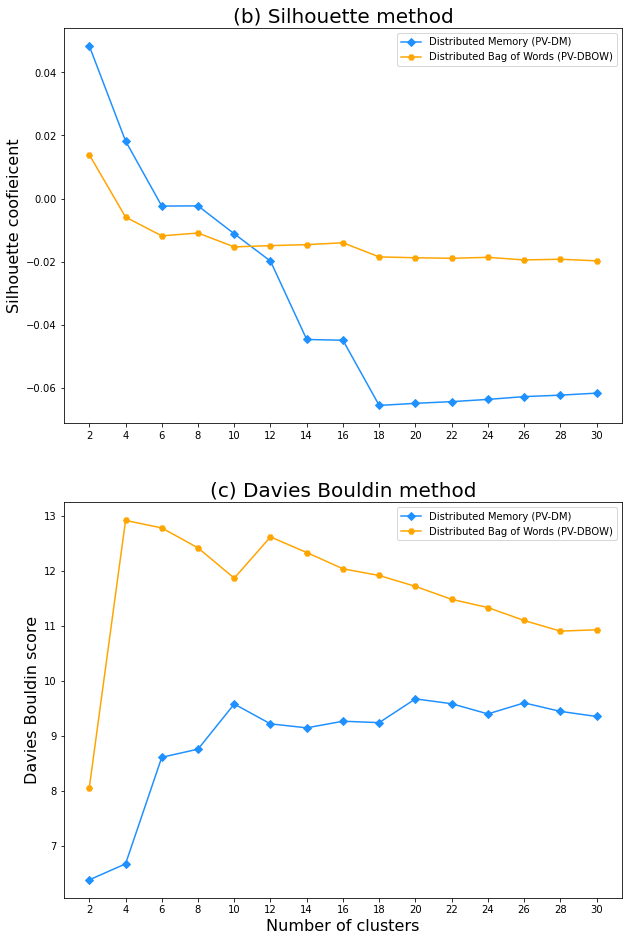

In [13]:
find_optimal_N_clusters_Birch(model_d2v_dm, model_d2v_DBOW, 30)

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
import matplotlib.pyplot as plt
import mpl_toolkits

import seaborn as sns

In [15]:
def birch_clustering(model, num_of_clusters):
    k_value = num_of_clusters
    
    brc = Birch(branching_factor = 50, 
                   n_clusters = k_value).fit(model.docvecs.vectors_docs)

    labels = brc.labels_.tolist()
    clusters = brc.fit_predict(model.docvecs.vectors_docs)
    
    return labels, clusters

In [24]:
#1 minute model_d2v_dm, model_d2v_DBOW,
labels_DM, clusters_DM = birch_clustering(model_d2v_dm, 2)
labels_DBOW, clusters_DBOW = birch_clustering(model_d2v_DBOW, 2)

In [31]:
clusters_DM

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
import pandas as pd
import nltk
import re

df = pd.read_csv("final_orig.csv", 
                 sep = '\t')

df['Text'] = df['Text'].str.lower()
sentenses_list = df['Text'].tolist()

In [38]:
df_new = pd.DataFrame()

In [39]:
df_new['texts'] = sentenses_list[:15000]

In [40]:
df_new['labels'] = labels_DBOW

In [42]:
df_new.head(10)

,texts,labels
0,i've been on and off depression for my entire ...,0
1,just a thought i have sometimes. i'm not getti...,0
2,i loved you at the beginning 2017. you took me...,1
3,i just want to be myself again.i am full of an...,0
4,"every ""day"" is the fucking same. wake up, show...",0
5,i can't do anything right anymore. my girl and...,0
6,i like learning more about depression. since i...,0
7,i was going to hang out with a few people who ...,0
8,i’ve sat in a dark room for 5 hours staring at...,0
9,"hi, do any of you have practical advice and m...",0


In [52]:
#temp_list = df_new['texts'][df_new['labels'] == 0].head(50).to_list()
temp_list = df_new['texts'][df_new['labels'] == 1].tail(50).to_list()

In [53]:
temp_list

["i wasn't the smartest kid, but i used to be motivated and relatively high functioning. now, i can barely summon the energy to go to school. every morning feels like i'm climbing out of this impossible ravine into the real world, only to fall back in once i get back home. and every morning, i make the trek back up. i'm so tired. i dissociate a lot. my brain is wrapped in cellophane and information can't get through. i can't pay attention to lectures or even understand shit when my friends try to explain concepts to me. i was always a slow worker, but its getting worse. my procrastination has reached dangerously high levels. i feel like i'm trapped underwater and everything around me is ten thousand miles away.  i'm still a dependent, and my parents don't believe mental health issues are valid so i can't get access to therapy/medication. advice would be appreciated. ",
 'my girlfriend(16) has depression and she constantly talks about how awful of a person and how she’s not beautiful. n

# 2D PCA Scatter Plot for clustering results

In [25]:
#2 dimensions
def plot_clusters_PCA(model, dimension, rand):
    pca = PCA(n_components = dimension, random_state = rand).fit(model.docvecs.vectors_docs)
    datapoint = pca.transform(model.docvecs.vectors_docs)
    
    return datapoint

datapoint_2D_DM = plot_clusters_PCA(model_d2v_dm, 2, 142)
datapoint_2D_DBOW = plot_clusters_PCA(model_d2v_DBOW, 2, 142)

datapoint_3D_DM = plot_clusters_PCA(model_d2v_dm, 3, 142)
datapoint_3D_DBOW = plot_clusters_PCA(model_d2v_DBOW, 3, 142)

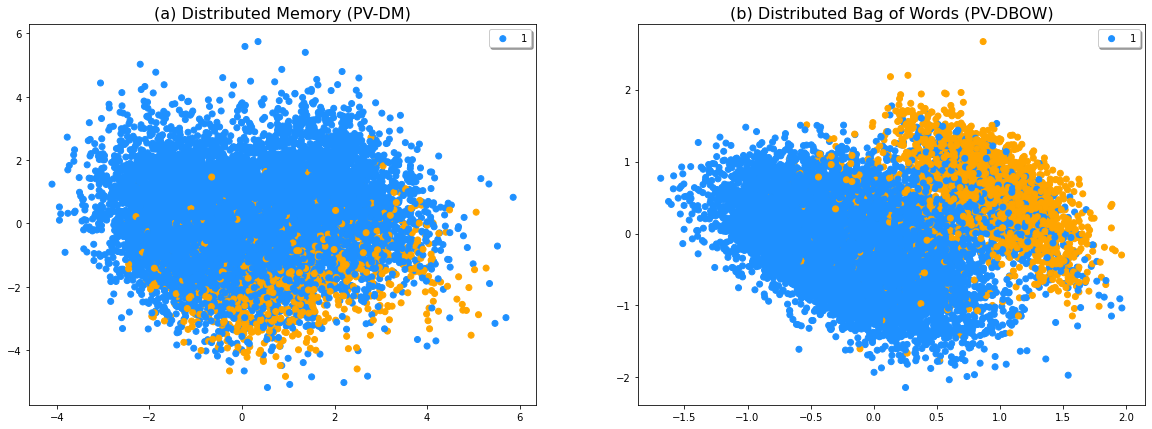

In [29]:
f, ax = plt.subplots(1, 2, figsize = (20, 7))

label_colors = ["dodgerblue", "orange"]

# labels_DM.sort()
# labels_DBOW.sort()

targets = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

color_DM = [label_colors[i] for i in labels_DM]
color_DBOW = [label_colors[i] for i in labels_DBOW]

ax[0].scatter(datapoint_2D_DM[:, 0], datapoint_2D_DM[:, 1], c = color_DM)
ax[0].set_title('(a) Distributed Memory (PV-DM)', fontsize = 16)

ax[1].scatter(datapoint_2D_DBOW[:, 0], datapoint_2D_DBOW[:, 1], c = color_DBOW)
ax[1].set_title('(b) Distributed Bag of Words (PV-DBOW)', fontsize = 16)

# 3D PCA Scatter Plot for clustering results

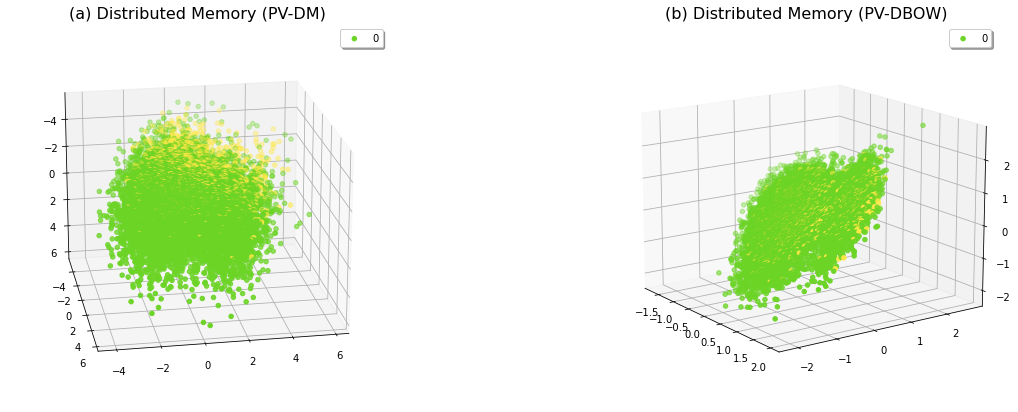

In [27]:
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(1, 2, 1, projection='3d', azim = 280, elev = 200)
ax.scatter(datapoint_3D_DM[:, 0], datapoint_3D_DM[:, 1],datapoint_3D_DM[:, 1], c = color_DM)
ax.set_title('(a) Distributed Memory (PV-DM)', fontsize = 16)
ax.legend(set(labels_DM), fancybox=True, shadow=True)

ax = fig.add_subplot(1, 2, 2, projection='3d', azim = 325, elev = 15)
ax.scatter(datapoint_3D_DBOW[:, 0], datapoint_3D_DBOW[:, 1],datapoint_3D_DBOW[:, 1], c = color_DM)
ax.set_title('(b) Distributed Memory (PV-DBOW)', fontsize = 16)
ax.legend(set(labels_DM), fancybox=True, shadow=True)

# 2D tSNE Scatter Plot for clustering results

In [10]:
#2 dimensions 14.19 - 14.23
def plot_clusters_tSNE(model, dimension, rand):
    tSNE = TSNE(n_components = dimension, random_state = rand)
    datap = tSNE.fit_transform(model.docvecs.vectors_docs)
    
    return datap

datap_2D_DM = plot_clusters_tSNE(model_d2v_dm, 2, 142)
datap_2D_DBOW = plot_clusters_tSNE(model_d2v_DBOW, 2, 142)

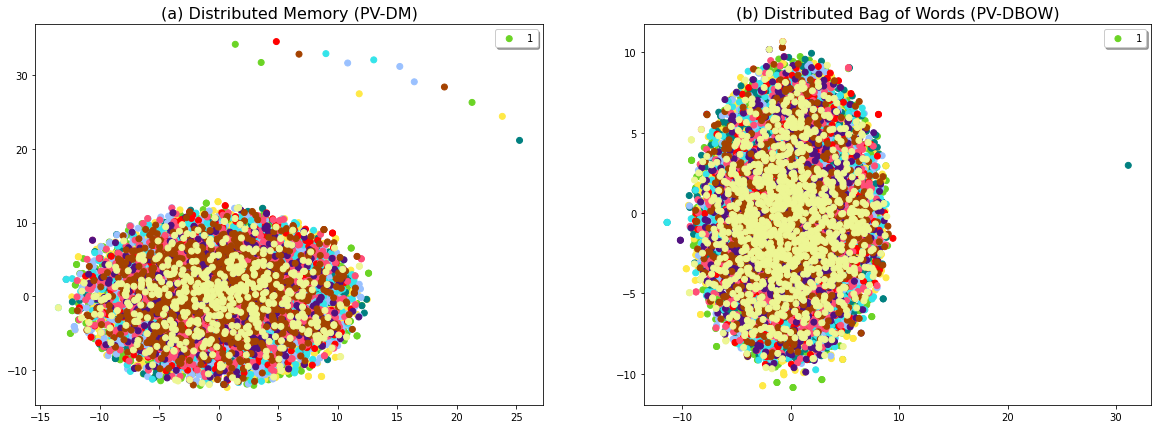

In [11]:
f, ax = plt.subplots(1, 2, figsize = (20, 7))

labels_DM.sort()
labels_DBOW.sort()

targets = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

color_DM = [label_colors[i] for i in labels_DM]
color_DBOW = [label_colors[i] for i in labels_DBOW]

ax[0].scatter(datap_2D_DM[:, 0], datap_2D_DM[:, 1], c = color_DM)
ax[0].set_title('(a) Distributed Memory (PV-DM)', fontsize = 16)
ax[0].legend(targets, fancybox=True, shadow=True)

ax[1].scatter(datap_2D_DBOW[:, 0], datap_2D_DBOW[:, 1], c = color_DBOW)
ax[1].set_title('(b) Distributed Bag of Words (PV-DBOW)', fontsize = 16)
ax[1].legend(targets, fancybox = True, shadow = True)

# 3D tSNE Scatter Plot for clustering results

In [12]:
datap_3D_DM = plot_clusters_tSNE(model_d2v_dm, 3, 142)
datap_3D_DBOW = plot_clusters_tSNE(model_d2v_DBOW, 3, 142)

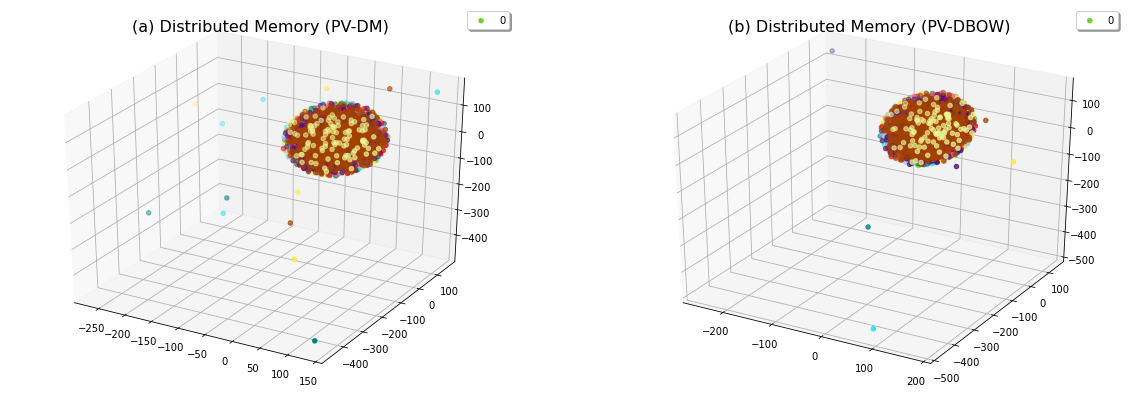

In [13]:
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(datap_3D_DM[:, 0], datap_3D_DM[:, 1],datap_3D_DM[:, 1], c = color_DM)
ax.set_title('(a) Distributed Memory (PV-DM)', fontsize = 16)
ax.legend(set(labels_DM), fancybox=True, shadow=True)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(datap_3D_DBOW[:, 0], datap_3D_DBOW[:, 1],datap_3D_DBOW[:, 1], c = color_DM)
ax.set_title('(b) Distributed Memory (PV-DBOW)', fontsize = 16)
ax.legend(set(labels_DM), fancybox=True, shadow=True)